In [97]:
import pandas as pd
from pathlib import Path
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.decomposition import PCA

from tqdm.notebook import tqdm
import time
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 100

In [98]:
#Load dummy tables
df_ingredient=pd.read_csv('../data/dummies/ingredient_dummy.csv')
df_keyword=pd.read_csv('../data/dummies/keyword_dummy.csv')

#load reduced files
# df_ingredient=pd.read_csv('./data/dummies/ingredient_dummy_dropna.csv')
# df_keyword=pd.read_csv('./data/dummies/keyword_dummy_dropna.csv')

In [99]:
#Table sizes
print('  ingredient ', '    keyword')
print(df_ingredient.shape, df_keyword.shape)

  ingredient      keyword
(123613, 2624) (123613, 317)


# ML Analysis

## Best Ingredients given input

In [278]:
#USER INPUT Example
recipe_type=['low cholesterol']
cook_time=['< 60 mins']
Region=['european']


input_selection={
    'Health':list(map(str.lower,recipe_type)),
    'Prep Time':list(map(str.lower,cook_time)),
    'Country':list(map(str.lower,Region))}
    

In [279]:
df_combined_keyword=df_keyword.copy()
df_combined_ingredient=df_ingredient.copy()

In [280]:
#Filter based on input_selection
filter = df_combined_keyword[[''.join(input_selection['Health']),''.join(input_selection['Prep Time']), ''.join(input_selection['Country'])]]
df_combined_keyword.drop(index=filter[filter.T.sum()<filter.T.sum().max()].index,inplace=True)

#filter based only on recipe_type and cook_time
# filter = df_combined_keyword[[''.join(input_selection['Health']),''.join(input_selection['Prep Time'])]]
# df_combined_keyword.drop(index=filter[filter.T.sum()<filter.T.sum().max()].index,inplace=True)

# filter based only on Region
# filter = df_combined_keyword[[''.join(input_selection['Country'])]]
# df_combined_keyword.drop(index=filter[filter.T.sum()<filter.T.sum().max()].index,inplace=True)
                                                                                              

In [281]:
df_combined_keyword.shape

(672, 317)

In [282]:
#Select the ingredient table rows that match the keyword table rows after filtering
df_combined = df_combined_ingredient.loc[df_combined_keyword.index]
drop_cols=df_combined.iloc[:,29:].sum()==0   #Column 29 and after is the dummy data
df_combined = df_combined.drop(columns=drop_cols[drop_cols].index,axis=1) #drop all columns that have 0s 
df_combined.dropna(subset=['AggregatedRating'], inplace=True)
df_combined.shape

(672, 767)

In [283]:
#training datasets
y=df_combined['AggregatedRating']
# X=df_combined.drop(columns='AggregatedRating')
X = df_combined.drop(columns=df_combined.columns[0:29])

In [284]:
X

,% fat cottage cheese,% low-fat milk,belgian endive,brussels sprout,brussels sprouts,bulgar wheat,canadian bacon,dijon mustard,english cucumber,english cucumbers,...,hot mustard,low-sodium tomatoes,mild curry powder,other pastas,parsley sprig,parsley sprigs,powdered saffron,fresh pepper,ground mace,red cayenne pepper
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
113,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
625,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
122817,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
122949,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
122996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [285]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
print(f"Model's slope: {model.coef_}")
print(f"Model's y-intercept: {model.intercept_}")
print(f"Model's formula: y = {model.intercept_} + {model.coef_[0]}X")

Model's slope: [-4.15778455e+12 -8.99681285e+13  4.96972354e+13 -4.59735699e-01
 -1.03290931e-01  2.72548072e+13 -1.22711468e+00 -1.32889560e-03
 -2.71850132e+12 -2.63904652e+00 -1.56569136e+00  3.86741220e-01
 -1.08080467e+13 -6.33187456e-01  1.62090546e-01 -2.33956025e+00
 -1.33778128e+00  2.20290510e-01  5.42087183e-01  5.32062591e+12
  1.27665543e+13 -1.01339268e+00  7.03934852e+12 -1.33806188e-01
  2.31268676e-01 -3.78727406e+00 -8.12026507e-01  1.13218682e+13
 -3.57326219e-01  8.26270854e-01  5.20799378e-01 -2.69556794e-01
  8.05175781e-01 -2.09341383e+13  1.79687500e-01  1.44430542e+00
 -6.48742676e-01  2.51101941e+13  4.68994141e-01 -1.02368164e+00
 -5.36364746e+00 -2.75695801e-01  2.14923398e+13  1.16439576e+13
 -2.54534412e+13 -4.41711426e-01  1.24394226e+00  4.24804688e-01
 -9.63445967e+12  1.66442871e-01 -1.14013672e-01 -4.48242188e-01
 -1.58691406e-02  1.68793475e+10 -9.93652344e-02 -1.14376477e+13
  2.26806641e-01  8.73779297e-01 -6.60705566e-01  3.86428833e-01
  6.201171

In [286]:
# Make predictions using the X set
predicted_y_values = pd.DataFrame(model.predict(X), columns=['predicted values'])
# Create a copy of the original data
df_ingredients_predicted = pd.concat([df_combined['AggregatedRating'].reset_index(),predicted_y_values],axis=1)

# Display sample data
df_ingredients_predicted.head()

,index,AggregatedRating,predicted values
0,11,5.0,4.917178
1,98,5.0,4.607204
2,102,5.0,5.973537
3,113,4.5,4.422749
4,625,3.5,3.592152


In [287]:
#boxplot x-axis
df_ingredients_predicted['AggregatedRating'].value_counts().index.sort_values()

Index([2.5, 3.0, 3.5, 4.0, 4.5, 5.0], dtype='float64', name='AggregatedRating')

In [288]:
#Prepping data for boxplot below
from numpy import random
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
boxes=[]
labels=[]
for rating in df_ingredients_predicted['AggregatedRating'].value_counts().index.sort_values():
    boxes.append(df_ingredients_predicted[df_ingredients_predicted['AggregatedRating']==rating]['predicted values'])
    labels.append(rating)

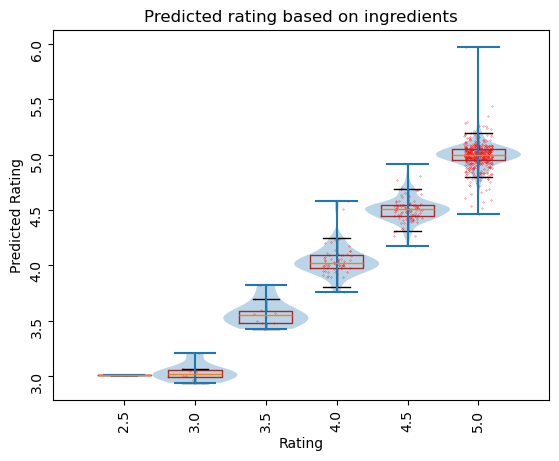

In [292]:
#Plot of predicted Rating based on website input
plt.boxplot(boxes,labels=labels, showbox=True, boxprops={'linestyle':'-', 'linewidth':1, 'color':'brown'}, flierprops={'marker': 'o', 'markersize': 0, 'markeredgecolor': 'red'} , positions=labels)
plt.violinplot(boxes, widths=.6, positions=labels)
plt.scatter(df_ingredients_predicted['AggregatedRating']+0.2*random.rand(len(df_ingredients_predicted['AggregatedRating']),1).ravel()-.1,
            df_ingredients_predicted['predicted values'],marker='o',s=.05,c='r')
plt.xticks(rotation=90)
plt.yticks(rotation=90)
plt.ylabel('Predicted Rating')
plt.xlabel('Rating')
plt.title('Predicted rating based on ingredients')
# plt.ylim(3,5)
# plt.savefig('Algorithm performance for european food.png', bbox_inches='tight', transparent=True)
plt.show()



In [265]:
X.sum()

% fat cottage cheese    1
bulgar wheat            1
english cucumber        1
english cucumbers       1
french lentils          1
                       ..
whole wheat flour       1
wine vinegar            1
yellow sweet pepper     1
yogurt                  1
zucchini                5
Length: 193, dtype: int64

In [293]:
#Best ingredients you can use given the website input
best_ingredients = pd.DataFrame({'ingredient': X.columns, 'impact':model.coef_, 'frequency':X.sum()})
# best_ingredients = best_ingredients.drop(index=best_ingredients[(best_ingredients['impact']>1e3)|(best_ingredients['impact']<-1e3)].index).sort_values(by='impact', ascending=False)
best_ingredients = best_ingredients.sort_values(by='impact', ascending=False)
best_ingredients[best_ingredients['frequency']>10].head(14)


,ingredient,impact,frequency
red wine vinegar,red wine vinegar,1.151855,11
nutmeg,nutmeg,1.000244,11
cumin,cumin,0.904785,12
red wine,red wine,0.843140,15
celery,celery,0.795898,34
ground black pepper,ground black pepper,0.772217,12
fresh lemon juice,fresh lemon juice,0.650635,21
penne pasta,penne pasta,0.636108,11
green onions,green onions,0.628418,14
fresh thyme,fresh thyme,0.553284,14


In [294]:
#Worst ingredients you can use given the website input
best_ingredients[best_ingredients['frequency']>10].tail(10)

,ingredient,impact,frequency
white pepper,white pepper,-0.618408,11
mozzarella cheese,mozzarella cheese,-0.702148,17
tomato paste,tomato paste,-0.735352,34
cayenne pepper,cayenne pepper,-0.739746,15
cinnamon,cinnamon,-0.804688,14
pasta,pasta,-0.832031,11
fresh dill,fresh dill,-0.905273,12
lemon zest,lemon zest,-0.907715,11
cannellini beans,cannellini beans,-1.252563,11
green beans,green beans,-1.812500,15


In [295]:
best_ingredients[best_ingredients['frequency']>10]['ingredient'].index[:10].to_list()

['red wine vinegar',
 'nutmeg',
 'cumin',
 'red wine',
 'celery',
 'ground black pepper',
 'fresh lemon juice',
 'penne pasta',
 'green onions',
 'fresh thyme']

In [116]:
# best_ingredients.to_csv('../data/dummies/best_ingredients_all.csv',index=False)